# Association Rules

### Problem Statement:- 

    - Prepare rules for the all the data sets 
        1) Try different values of support and confidence. Observe the change in number of rules for 
        different support,confidence values

        2) Change the minimum length in apriori algorithm

        3) Visulize the obtained rules using different plots 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules

In [3]:
groceries = []
with open("groceries.csv") as f:
    groceries = f.read()

In [4]:
groceries[:10]

'citrus fru'

In [5]:
# splitting the data into separate transactions using separator as "\n"
groceries = groceries.split("\n")
groceries_list = []
for i in groceries:
    groceries_list.append(i.split(","))

In [6]:
groceries_list[1:5]

[['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product']]

In [7]:
all_groceries_list = [i for item in groceries_list for i in item]

In [8]:
all_groceries_list [1:10]

['semi-finished bread',
 'margarine',
 'ready soups',
 'tropical fruit',
 'yogurt',
 'coffee',
 'whole milk',
 'pip fruit',
 'yogurt']

In [9]:
from collections import Counter,OrderedDict

In [10]:
item_frequencies = Counter(all_groceries_list)
# after sorting
item_frequencies = sorted(item_frequencies.items(),key = lambda x:x[1])

In [11]:
item_frequencies[1:10]

[('sound storage medium', 1),
 ('', 1),
 ('preservation products', 2),
 ('bags', 4),
 ('kitchen utensil', 4),
 ('baby cosmetics', 6),
 ('frozen chicken', 6),
 ('toilet cleaner', 7),
 ('make up remover', 8)]

In [12]:
# Storing frequencies and items in separate variables 
frequencies = list(reversed([i[1] for i in item_frequencies]))
items = list(reversed([i[0] for i in item_frequencies]))

In [13]:
print(frequencies[0:11])
print(items[0:11])

[2513, 1903, 1809, 1715, 1372, 1087, 1072, 1032, 969, 924, 875]
['whole milk', 'other vegetables', 'rolls/buns', 'soda', 'yogurt', 'bottled water', 'root vegetables', 'tropical fruit', 'shopping bags', 'sausage', 'pastry']


### Visualization

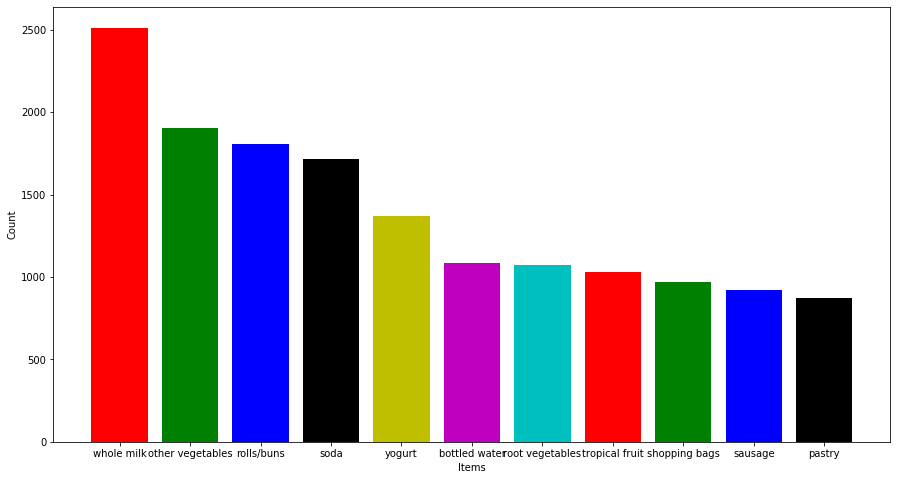

In [37]:
# barplot of top 10 

import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.bar(height = frequencies[0:11],x = list(range(0,11)),color='rgbkymc');plt.xticks(list(range(0,11),),items[0:11]);plt.xlabel("items")
plt.ylabel("Count");plt.xlabel("Items")
plt.show()

In [15]:
# Creating Data Frame for the transactions data 

groceries_series  = pd.DataFrame(pd.Series(groceries_list))

In [16]:
groceries_series.shape

(9836, 1)

In [17]:
groceries_series = groceries_series.iloc[:9835,:] # removing the last empty transaction

groceries_series.columns = ["transactions"]

In [18]:
# creating a dummy columns for the each item in each transactions ... Using column names as item name
X = groceries_series['transactions'].str.join(sep='*').str.get_dummies(sep='*')

In [19]:
X.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
frequent_itemsets = apriori(X, min_support=0.005, max_len=3,use_colnames = True)

In [21]:
# Most Frequent item sets based on support 
frequent_itemsets.sort_values('support',ascending = False,inplace=True)

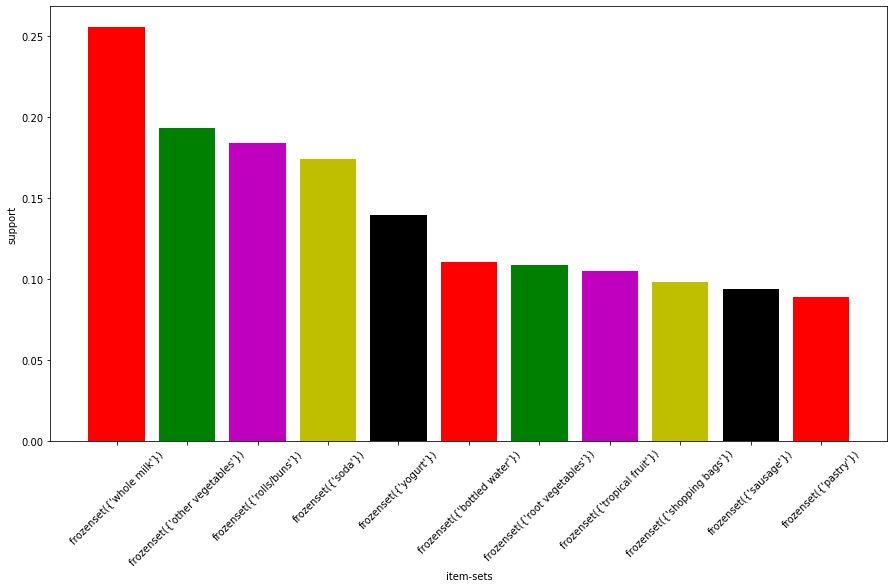

In [22]:
plt.figure(figsize=(15,8))
plt.bar(x = list(range(0,11)),height = frequent_itemsets.support[0:11],color='rgmyk');plt.xticks(list(range(0,11)),frequent_itemsets.itemsets[0:11])
plt.xlabel('item-sets');plt.ylabel('support')
plt.xticks(rotation=45)
plt.show()

In [23]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
2,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
3,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
4,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132


In [24]:
print(len(rules))

2700


In [25]:
rules.sort_values('lift',ascending = False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2559,(ham),(white bread),0.026029,0.042095,0.005084,0.195312,4.639851,0.003988,1.190407
2558,(white bread),(ham),0.042095,0.026029,0.005084,0.120773,4.639851,0.003988,1.107758
2021,(whipped/sour cream),"(other vegetables, butter)",0.071683,0.020031,0.005796,0.080851,4.036397,0.004360,1.066171
2020,"(other vegetables, butter)",(whipped/sour cream),0.020031,0.071683,0.005796,0.289340,4.036397,0.004360,1.306275
1312,(root vegetables),(herbs),0.108998,0.016268,0.007016,0.064366,3.956477,0.005243,1.051406


### Visualizing Results

#### Support vs Confidence

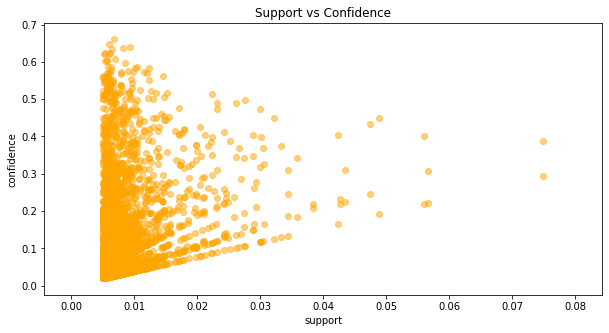

In [26]:
plt.figure(figsize=(10,5))
plt.scatter(rules['support'], rules['confidence'], c='orange',alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

#### Support vs Lift

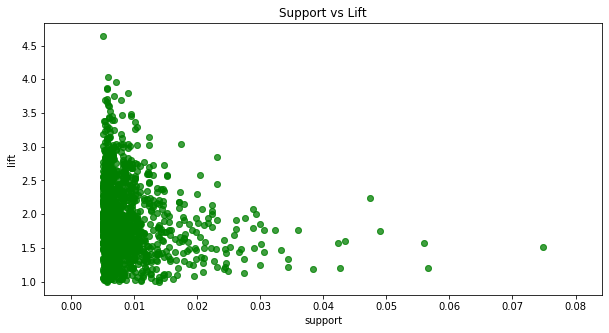

In [27]:
plt.figure(figsize=(10,5))
plt.scatter(rules['support'], rules['lift'], c='g', alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

#### Confidence vs Lift

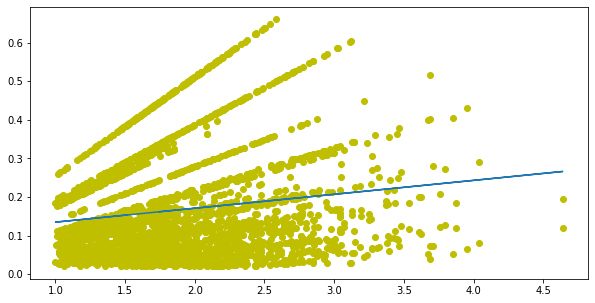

In [28]:
import numpy as np
plt.figure(figsize=(10,5))
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))
plt.show()

### Changing the Support and Max length

In [29]:
frequent_itemsets = apriori(X, min_support=0.0045, max_len=2,use_colnames = True)

In [30]:
# Most Frequent item sets based on support 
frequent_itemsets.sort_values('support',ascending = False,inplace=True)

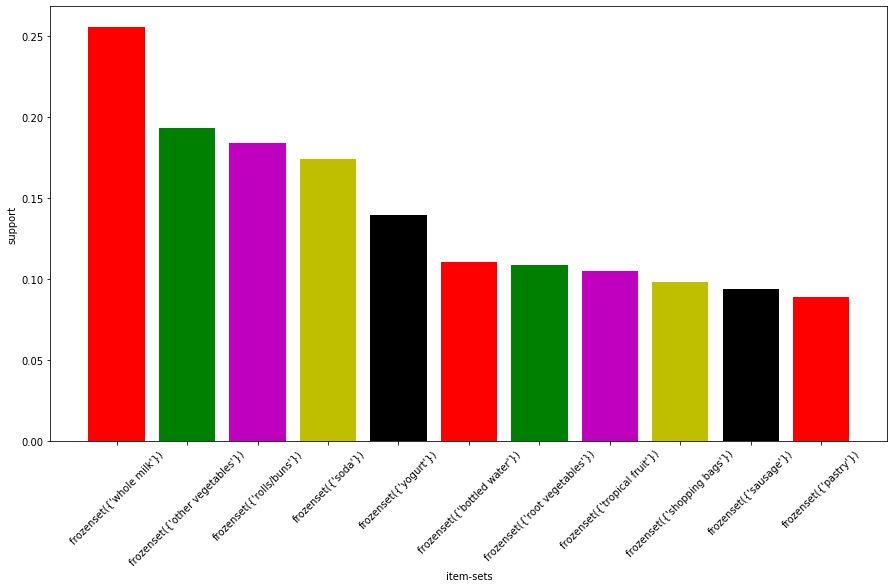

In [31]:
plt.figure(figsize=(15,8))
plt.bar(x = list(range(0,11)),height = frequent_itemsets.support[0:11],color='rgmyk');plt.xticks(list(range(0,11)),frequent_itemsets.itemsets[0:11])
plt.xlabel('item-sets');plt.ylabel('support')
plt.xticks(rotation=45)
plt.show()

In [32]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
2,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
3,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
4,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132


In [33]:
print(len(rules))

1316


### Visualization with changed values

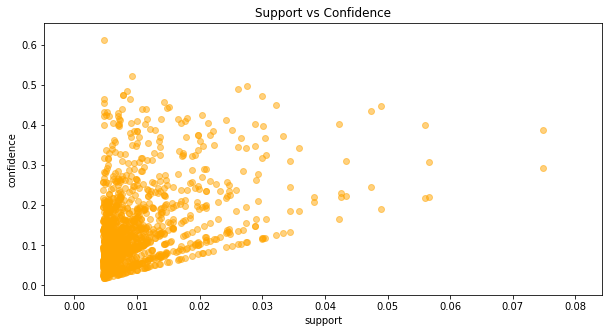

In [34]:
plt.figure(figsize=(10,5))
plt.scatter(rules['support'], rules['confidence'], c='orange',alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

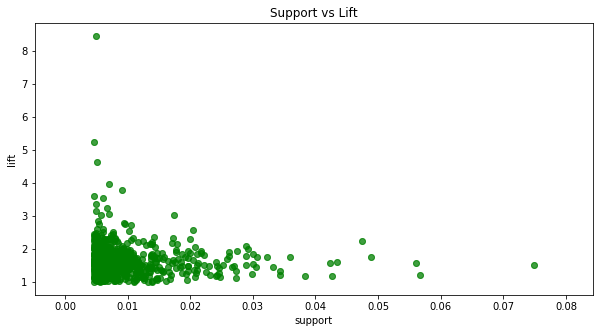

In [35]:
plt.figure(figsize=(10,5))
plt.scatter(rules['support'], rules['lift'], c='g', alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

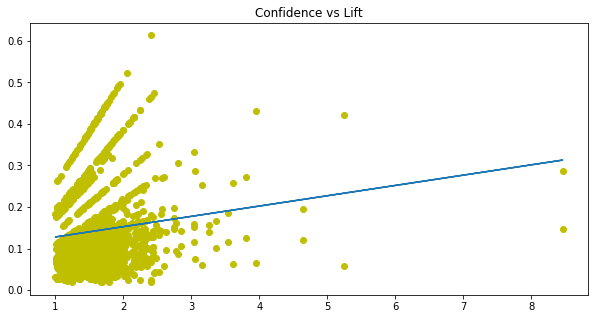

In [38]:
import numpy as np
plt.figure(figsize=(10,5))
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))
plt.title('Confidence vs Lift')
plt.show()

### Conclusion

    - With min_support=0.005,  max_len=3, there are 2700 rules are generated.
    - With min_support=0.0045, max_len=2, there are 1316 rules are generated.